In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [2]:
data=pd.read_csv("//Users//tanishqsharma//Downloads//Telco-Customer-Churn.csv")

In [3]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [5]:
data.shape

(7043, 21)

In [6]:
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [7]:
data['TotalCharges']=pd.to_numeric(data['TotalCharges'],errors='coerce')

In [8]:
data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [9]:
data.dropna(inplace=True)

In [10]:
data.shape

(7032, 21)

In [11]:
data['Churn'].value_counts(normalize=True)*100

Churn
No     73.421502
Yes    26.578498
Name: proportion, dtype: float64

In [12]:
tenure_churn_no=data[data['Churn']=='No']['tenure']
tenure_churn_yes=data[data['Churn']=='Yes']['tenure']

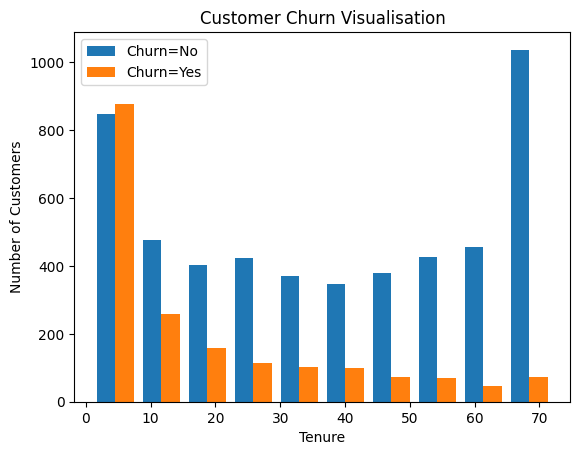

In [13]:
plt.hist([tenure_churn_no,tenure_churn_yes],label=['Churn=No','Churn=Yes']);
plt.legend();
plt.xlabel('Tenure')
plt.ylabel('Number of Customers')
plt.title('Customer Churn Visualisation')
plt.show()

In [14]:
monthly_charges_churn_no=data[data['Churn']=='No']['MonthlyCharges']
monthly_charges_churn_yes=data[data['Churn']=='Yes']['MonthlyCharges']

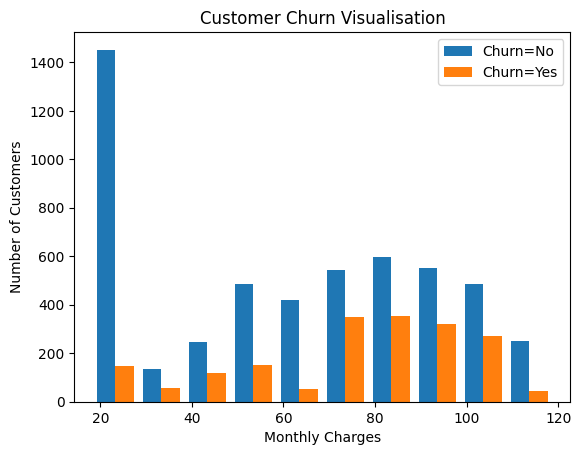

In [15]:
plt.hist([monthly_charges_churn_no,monthly_charges_churn_yes],label=['Churn=No','Churn=Yes']);
plt.legend();
plt.xlabel('Monthly Charges')
plt.ylabel('Number of Customers')
plt.title('Customer Churn Visualisation')
plt.show()

In [16]:
for column in data:
    if data[column].dtypes=='object':
        print(f'{column}:{data[column].unique()}')

customerID:['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender:['Female' 'Male']
Partner:['Yes' 'No']
Dependents:['No' 'Yes']
PhoneService:['No' 'Yes']
MultipleLines:['No phone service' 'No' 'Yes']
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:['No' 'Yes' 'No internet service']
OnlineBackup:['Yes' 'No' 'No internet service']
DeviceProtection:['No' 'Yes' 'No internet service']
TechSupport:['No' 'Yes' 'No internet service']
StreamingTV:['No' 'Yes' 'No internet service']
StreamingMovies:['No' 'Yes' 'No internet service']
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:['Yes' 'No']
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn:['No' 'Yes']


In [17]:
data.replace('No internet service','No',inplace=True)
data.replace('No phone service','No',inplace=True)

In [18]:
data1=data.drop('customerID',axis=1)

In [19]:
data1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [20]:
data1['Churn'].replace('Yes',1,inplace=True)
data1['Churn'].replace('No',0,inplace=True)

In [21]:
data2=pd.get_dummies(data1,dtype=int)
data2.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0


In [22]:
x=data2.drop('Churn',axis='columns')
y=data2['Churn']

In [23]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=3)

In [24]:
from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression()
result = model_lr.fit(xtrain, ytrain)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [25]:
ypred_lr = model_lr.predict(xtest)
print(f'Model Accuracy is {metrics.accuracy_score(ytest,ypred_lr)}')
print(f'Model Accuracy is {metrics.precision_score(ytest,ypred_lr)}')
print(f'Model Accuracy is {metrics.f1_score(ytest,ypred_lr)}')
print(f'Model Accuracy is {metrics.recall_score(ytest,ypred_lr)}')

Model Accuracy is 0.8031272210376688
Model Accuracy is 0.6238244514106583
Model Accuracy is 0.5896296296296296
Model Accuracy is 0.5589887640449438


In [26]:
print(metrics.classification_report(ytest,ypred_lr))

              precision    recall  f1-score   support

           0       0.86      0.89      0.87      1051
           1       0.62      0.56      0.59       356

    accuracy                           0.80      1407
   macro avg       0.74      0.72      0.73      1407
weighted avg       0.80      0.80      0.80      1407



In [27]:
model=RandomForestClassifier()

In [28]:
model.fit(xtrain,ytrain)

RandomForestClassifier()

In [29]:
ypred=model.predict(xtest)
print(f'Model Accuracy is {metrics.accuracy_score(ytest,ypred)}')
print(f'Model Accuracy is {metrics.precision_score(ytest,ypred)}')
print(f'Model Accuracy is {metrics.f1_score(ytest,ypred)}')
print(f'Model Accuracy is {metrics.recall_score(ytest,ypred)}')

Model Accuracy is 0.7860696517412935
Model Accuracy is 0.5964912280701754
Model Accuracy is 0.5304212168486739
Model Accuracy is 0.47752808988764045


In [30]:
print(metrics.classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1051
           1       0.60      0.48      0.53       356

    accuracy                           0.79      1407
   macro avg       0.72      0.68      0.70      1407
weighted avg       0.77      0.79      0.78      1407



In [31]:
from sklearn.svm import SVC
model.svm = SVC(kernel='linear') 
model.svm.fit(xtrain,ytrain)
preds = model.svm.predict(xtest)
metrics.accuracy_score(ytest, preds)

0.8045486851457001

In [32]:
print(metrics.classification_report(ytest,preds))

              precision    recall  f1-score   support

           0       0.83      0.92      0.88      1051
           1       0.67      0.45      0.54       356

    accuracy                           0.80      1407
   macro avg       0.75      0.69      0.71      1407
weighted avg       0.79      0.80      0.79      1407



In [33]:
from sklearn.ensemble import AdaBoostClassifier
model_ada = AdaBoostClassifier()
model_ada.fit(xtrain,ytrain)
preds_ada = model.predict(xtest)
metrics.accuracy_score(ytest, preds_ada)

0.7860696517412935

In [34]:
print(metrics.classification_report(ytest,preds_ada))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1051
           1       0.60      0.48      0.53       356

    accuracy                           0.79      1407
   macro avg       0.72      0.68      0.70      1407
weighted avg       0.77      0.79      0.78      1407

